<a href="https://colab.research.google.com/github/roh203/Transfer-Learning-for-improving-the-prediction-accuracy-of-Experimental-data/blob/main/transfer_learninig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Transfer_DataSet - Sheet2.csv')

In [ ]:
data.head()

,Type,Catalyst Name,Temp (K),Pressure (bar),p(H2)/p(CO2),Xco2(%),Sch3oh(%),Ych3oh
0,CZ,CuO-ZnO-AL2O3-Cr203,523,70,3.0,25.2,78.9,19.88
1,CZ,Cu /ZnO/Al2O3,479,20,3.0,11.6,75.0,8.70
2,CZ,CZA-C-1.25 (Citric acid: salt ratio-1.25),513,30,3.0,16.2,63.8,10.34
3,CZ,CZA-300,513,30,3.0,40.1,58.1,23.30
4,CZ,CuZnAl (58:25:17)-400 (milling at 400 rpm),513,30,3.0,50.0,64.2,32.10


In [ ]:
from pandas.core.reshape.reshape import get_dummies
Type = get_dummies(data['Type'], drop_first = True)

Type includes C, CZ, NC

In [ ]:
Type

In [ ]:
data.drop(['Type','p(H2)/p(CO2)'], axis = 1, inplace = True)

In [ ]:
data = pd.concat([data,Type], axis = 1)

In [ ]:
data.isnull().sum()

Catalyst Name     0
Temp (K)          0
Pressure (bar)    0
Xco2(%)           0
Sch3oh(%)         0
Ych3oh            1
CZ                0
NC                0
dtype: int64

In [ ]:
# data['p(H2)/p(CO2)'].mode()

In [ ]:
# data['p(H2)/p(CO2)'] = data['p(H2)/p(CO2)'].fillna(3)

In [ ]:
data['Ych3oh'].mode()

0    14.0
dtype: float64

In [ ]:
data['Ych3oh'] = data['Ych3oh'].fillna(14)

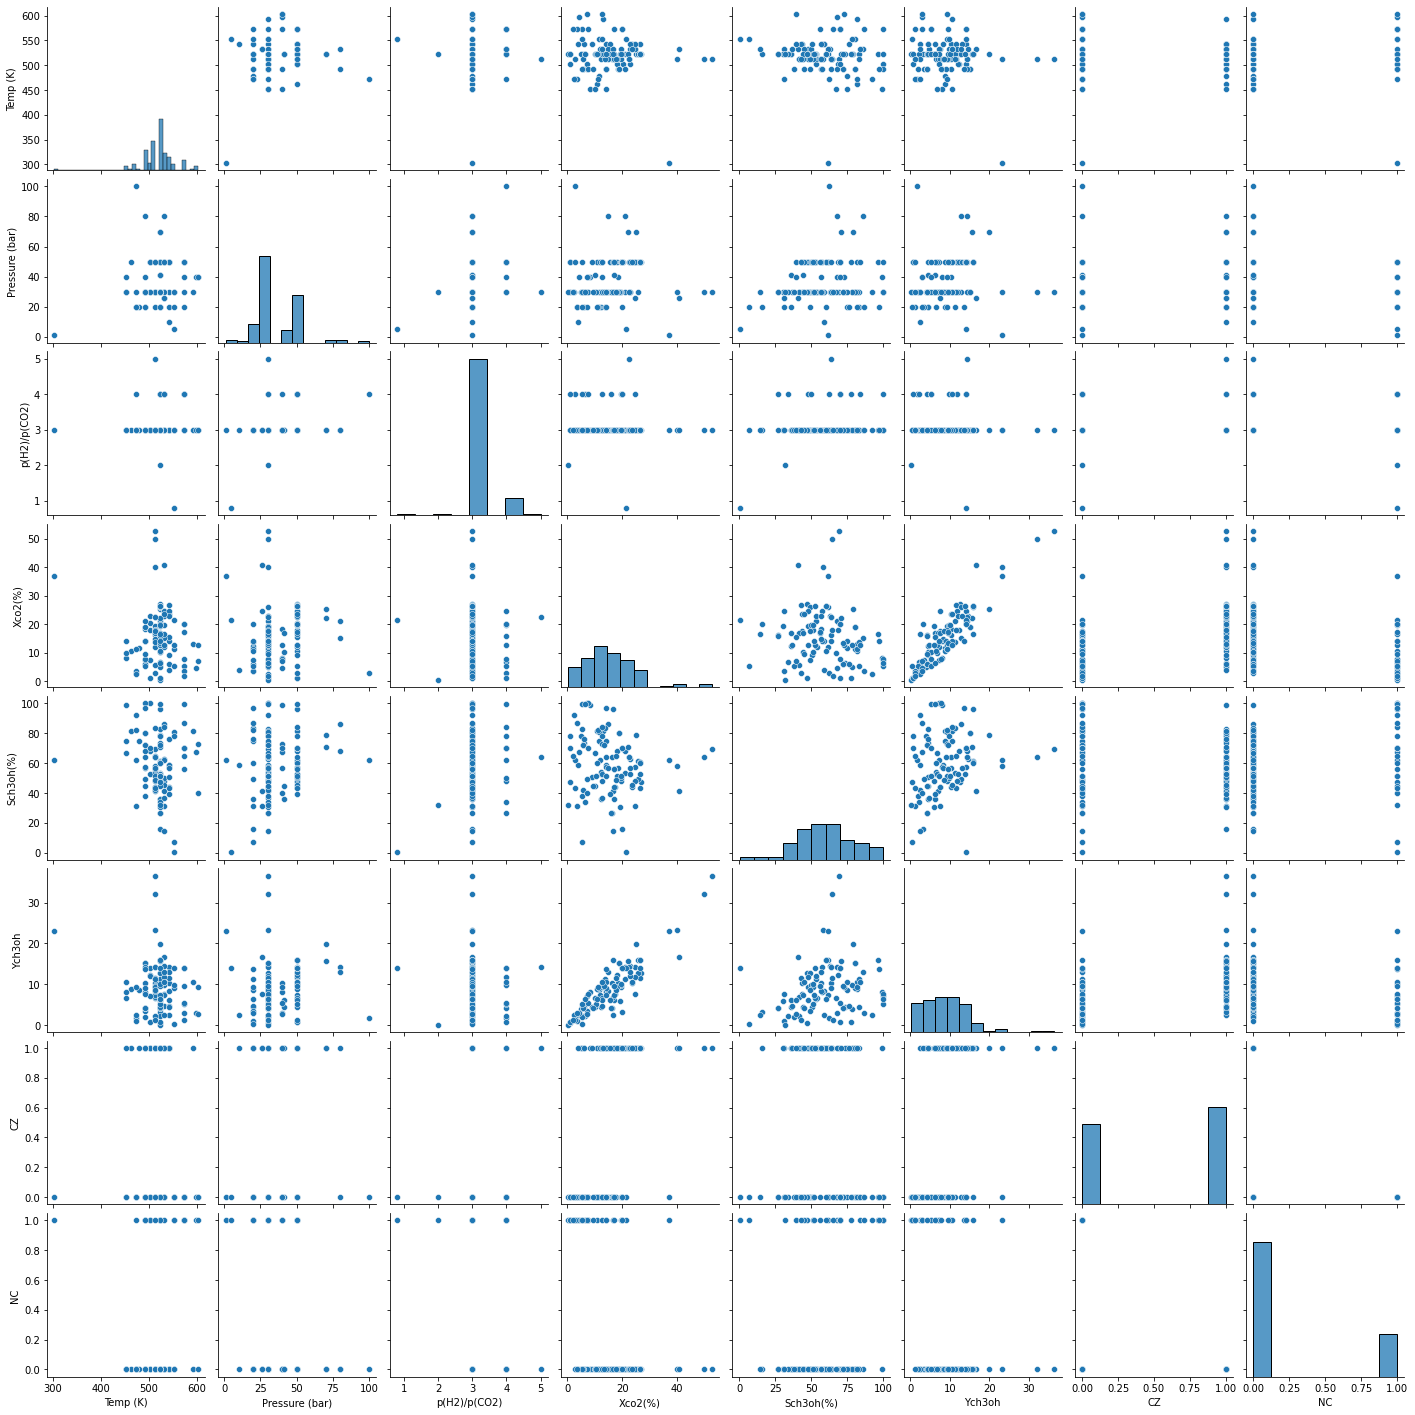

In [ ]:
sns.pairplot(data)

In [ ]:
data = data.drop('Catalyst Name', axis = 1)

In [ ]:
x = data.loc[:,data.columns != 'Ych3oh']
y = data.loc[:, 'Ych3oh']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
mse = cross_val_score(lin_reg,x,y,scoring = 'neg_mean_squared_error', cv=106)
mean_mse = np.mean(mse)
print(mean_mse)

-2.687338671691428


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.05, random_state=1)

In [ ]:
# i = 1
# for i in range(data.shape[0]-2):
#   mse = cross_val_score(lin_reg,x,y,scoring = 'neg_mean_squared_error', cv=i+2)
#   mean_mse = np.mean(mse)
#   print('the i is {} and mean_mse is {}'.format(i+2, mean_mse))

the loop was used to get least mean_mse value

In [ ]:
lin_reg.fit(x_train,y_train)
y_pred = lin_reg.predict(x_test)

In [ ]:
y_test = np.array(y_test)

In [ ]:
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7409925055709786
Mean Squared Error: 0.8023286954306491
Root Mean Squared Error: 0.8957280253685541


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

In [ ]:
def R2_score(a,b):
  E1_sqr = []
  E2 = []
  mean = y_test.mean()
  i=0
  for i in range(y_test.shape[0]):
    k = (y_test[i]-y_pred[i])**2
    E1_sqr.append(k)
    l = (y_test[i]- mean)**2
    E2.append(l)

  E2 = np.array(E2)
  E1_sqr = np.array(E1_sqr)
  R_sqr = 1- (E1_sqr.sum()/E2.sum())
  return (R_sqr)


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9312870804607547

In [ ]:
# R2_score(y_test,y_pred)

0.9312870804607547

In [ ]:
data.head()

,Temp (K),Pressure (bar),Xco2(%),Sch3oh(%),Ych3oh,CZ,NC
0,523,70,25.2,78.9,19.88,1,0
1,479,20,11.6,75.0,8.70,1,0
2,513,30,16.2,63.8,10.34,1,0
3,513,30,40.1,58.1,23.30,1,0
4,513,30,50.0,64.2,32.10,1,0


In [ ]:
test_final = pd.read_csv('/content/Overall Catalytic Activity_CuMgO_Hydrothermal.csv')

In [ ]:
test_final.head()

,Temperature (deg C),Temp (K),Pressure (bar),Conversion (%),Selectivity (%),STY (gmethanol/gcat.hr),Y%,CZ,NC
0,220.0,493.0,40.0,20.172403,73.103632,0.007296,45.857448,0.0,0.0
1,220.0,493.0,30.0,15.765789,76.191929,0.004113,25.847530,0.0,0.0
2,220.0,493.0,25.0,13.495660,80.653481,0.003842,24.146471,0.0,0.0
3,220.0,493.0,20.0,11.621643,84.827300,0.003700,23.255081,0.0,0.0
4,240.0,513.0,40.0,23.544962,71.033577,0.008524,53.577017,0.0,0.0


In [ ]:
test_final = test_final.drop('Temperature (deg C)',axis=1)
test_final = test_final.drop('STY (gmethanol/gcat.hr)',axis = 1)

In [ ]:
x_test_final = test_final.loc[0:13,test_final.columns != 'Y%']
y_test_final= test_final.loc[0:13,'Y%']

In [ ]:
print(x_test_final)
print(y_test_final)

    Temp (K)  Pressure (bar)  Conversion (%)  Selectivity (%)   CZ   NC
0      493.0            40.0       20.172403        73.103632  0.0  0.0
1      493.0            30.0       15.765789        76.191929  0.0  0.0
2      493.0            25.0       13.495660        80.653481  0.0  0.0
3      493.0            20.0       11.621643        84.827300  0.0  0.0
4      513.0            40.0       23.544962        71.033577  0.0  0.0
5      513.0            30.0       18.517541        73.284265  0.0  0.0
6      513.0            25.0       15.189940        77.460979  0.0  0.0
7      513.0            20.0       13.479361        83.820649  0.0  0.0
8      473.0            40.0       16.328642        77.350950  0.0  0.0
9      473.0            30.0       14.878753        80.380712  0.0  0.0
10     473.0            25.0       12.923825        85.374446  0.0  0.0
11     473.0            20.0        9.602340        89.386545  0.0  0.0
12     483.0            40.0       17.332799        74.934360  0

In [ ]:
y_pred_final = lin_reg.predict(x_test_final)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Conversion (%)
- Selectivity (%)
Feature names seen at fit time, yet now missing:
- Sch3oh(%)
- Xco2(%)

  warnings.warn(message, FutureWarning)


In [ ]:
r2_score(y_test_final,y_pred_final)

-0.9342699234611271

In [ ]:
y_pred_final

array([13.77248851, 11.35036168, 10.40842819,  9.68071687, 15.57056661,
       12.6755884 , 11.04971793, 10.65561914, 11.91483455, 11.3140445 ,
       10.62356665,  8.98396004, 12.24524228, 16.85059698])

In [ ]:
y_test_final

0     45.857448
1     25.847530
2     24.146471
3     23.255081
4     53.577017
5     43.474610
6     37.400963
7     26.734437
8     24.636848
9     10.317886
10     5.716503
11     5.124459
12    29.803570
13    66.209462
Name: Y%, dtype: float64